<a href="https://colab.research.google.com/github/MKhromina/test_task/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_3_(%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В прилагаемом файле (практика 2) представлены данные, собранные путем голосования за самые лучшие (или, по крайней мере, самые популярные) конфеты Хэллоуина. Обучите модель логистической регрессии. В качестве предикторов выступают поля: chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus, sugarpercent, pricepercent, отклик — Y.

В качестве тренировочного набора данных используйте данные из файла, за иключением следующих конфет: Boston Baked Beans, Dum Dums, Fruit Chews. Обучите модель.

Если используете Python, используйте модель с параметрами: LogisticRegression(random_state=2019, solver='lbfgs').

In [ ]:
# подключение библиотек
from google.colab import files
import numpy as np
import pandas as pd

In [ ]:
data=files.upload()

Saving Практика_2.2.csv to Практика_2.2.csv


In [ ]:
data = pd.read_csv("Практика_2.2.csv", index_col='competitorname')

In [ ]:
data.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


In [ ]:
#обучение модели будем проводить на данных, за исключением некоторых конфет
train_data = data.drop(['Boston Baked Beans','Dum Dums','Fruit Chews'])

In [ ]:
#отбор данных для предикторов, удаление дввух последних столбцов, индекс не включается в данные автоматически.
X = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))

In [ ]:
#отбор столбца для отклика
y = pd.DataFrame(train_data['Y'])

Обучение модели логистической регрессии

In [ ]:
#подключение модели логистической регрессии из библиотеки sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
#обучение модели
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y.values.ravel())

Для задач мультикласса 'lbfgs' обрабатывает полиномиальные потери
Функции numpy.ravel () возвращают непрерывный плоский массив (одномерный массив со всеми элементами входного массива и с тем же типом, что и он)

In [ ]:
#предсказание для сладости из таблицы
#выбор строки из таблицы
Boston_Baked_Beans = data.loc['Boston Baked Beans',:].to_frame().T
#отбор данных для предикторов и предсказание
reg.predict(Boston_Baked_Beans.drop(['winpercent', 'Y'], axis=1))

array([0])

In [ ]:
test_data=files.upload()

Saving Практика_3.csv to Практика_3.csv


In [ ]:
test_data = pd.read_csv("Практика_3.csv", index_col='competitorname')
X_test = pd.DataFrame(test_data.drop(['Y'], axis=1))

вероятность отнесения конфеты Tootsie Roll Midgies к классу 1:

вероятность отнесения конфеты Trolli Sour Bites к классу 1:



In [ ]:
#предсказание с помощью обученной модели, порог отсечения по умолчанию составляет 0.5
Y_pred = reg.predict(X_test)

In [ ]:
Y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
#вероятности отнесения к 0 и 1 классу объектов тестовых данных соответствнно
Y_pred_probs = reg.predict_proba(X_test)

In [ ]:
#отбор вероятностей отнесения объектов к классу 1
Y_pred_probs_class_1 = Y_pred_probs[:, 1]

In [ ]:
Y_pred_probs_class_1

array([0.29381949, 0.35117291, 0.36574772, 0.39769013, 0.7399637 ,
       0.68094873, 0.68291219, 0.77694363, 0.3800207 , 0.4092548 ,
       0.37284768, 0.16045262, 0.37787541, 0.56144361, 0.73154886])

In [ ]:
#отбор отклика Y из тестовых данных и преобразование в массив
Y_true = (test_data['Y'].to_frame().T).values.ravel()

In [ ]:
#подключение библиотеки для вычисления метрик
from sklearn import metrics

•TP (True Positives) – верно классифицированные положительные при-
меры;

• TN (True Negatives) – верно классифицированные отрицательные при-
меры;

• FN (False Negatives) – положительные примеры, классифицированные
как отрицательные (ошибка I рода);
• FP (False Positives) – отрицательные примеры, классифицированные
как положительные (ошибка II рода).

• доля истинно положительных примеров обозначается как TPR (True
Positives Rate):

TPR =TP/(TP + FN)

• доля ложно положительных примеров обозначается как FPR (False
Positives Rate):

FPR =FP/(TN + FP)

In [ ]:
fpr, tpr, _ = metrics.roc_curve(Y_true, Y_pred)

•Чувствительность (Sensitivity) – отражает долю положительных ре-
зультатов, которые правильно идентифицированы. Эта характеристика

равна доле истинно положительных примеров:
Se = TPR;

•Специфичность (Specificity) – отражает долю отрицательных результа-
тов, которые правильно идентифицированы как таковые:

Sp = 1 − FPR 


• Precision – это доля объектов, действительно являющихся положитель-
ными к тем, что названы положительными в результате классификации. На
основании значений матрицы ошибок точность можно вычислить следующим
образом:

Precision = TP/(TP + FP)

• Recall – характеризует долю объектов, классифицированных как поло-
жительные к тем, что действительно являются положительными и полностью
соответствует значению TPR:

Recall = TP/(TP + FN)
.

In [ ]:
#вычисляем AUC
metrics.roc_auc_score(Y_true, Y_pred_probs_class_1)

0.8799999999999999

In [ ]:
#вычисление Recall
metrics.recall_score(Y_true, Y_pred)

0.6

In [ ]:
#вычисление Precision
metrics.precision_score(Y_true, Y_pred)

0.5

In [ ]:
#подключим библиотеки для визуализации
import matplotlib.pyplot as plt
%matplotlib inline

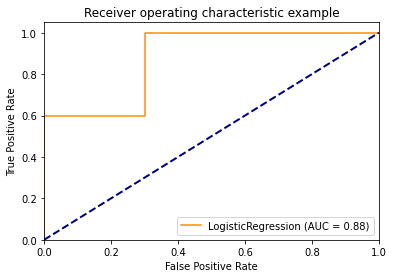

In [ ]:
metrics.plot_roc_curve(reg, X_test, Y_true, color='darkorange') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

Оптимальным значением порога, будет точка пересечения графика чувствительности и специфичности. График строится аналогично ROC-кривой,только мы строим на одной плоскости зависимость чувствительности от порога, и специфичности от порога